<a href="https://colab.research.google.com/github/isabellaloren4/isabellaloren4/blob/main/deepchem_features_new_acp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --pre deepchem
!pip install rdkit-pypi
!pip install pytoda
!pip install pubchempy
!pip install mordred

In [ ]:
#Extraindo as seqências e tranformando em smiles
import deepchem as dc
import pandas as pd
import numpy as np
from pytoda.proteins import aas_to_smiles
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

No normalization for AvgIpc. Feature removed!
2023-10-24 00:35:44.156997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 00:35:45.008826: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-24 00:35:47.726402: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/li

In [ ]:
print(MoleculeDescriptors)

<module 'rdkit.ML.Descriptors.MoleculeDescriptors' from '/opt/conda/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py'>


In [ ]:
#facp = open("acp.txt",'r')
#fnacp = open("nacp.txt", 'r')

#acp = facp.readlines()
#nacp = fnacp.readlines()

#facp.close()
#fnacp.close()

acp=[]
sequencia = "ICLRLPGC"
acp.append(sequencia)
#limpando os dados de acp e nacp
tam_acp=len(acp)
#tam_nacp=len(nacp)

#Criando a lista para as sequências smiles
smiles = []
mols = []
y = []
for i in range(len(acp)):

    mol = Chem.rdmolfiles.MolFromFASTA(acp[i][:-1], sanitize=True)
    #mols.append(Chem.Mol(mol))
    mols.append(mol)
    smiles.append(Chem.rdmolfiles.MolToSmiles(mol, canonical=True))

    #smiles.append(aas_to_smiles(acp[i][:-1]))

    y.append(1)

#for i in range(len(nacp)):

    #mol = Chem.rdmolfiles.MolFromFASTA(nacp[i][:-1], sanitize=True)
    #mols.append(Chem.Mol(mol))
    #mols.append(mol)
    #smiles.append(Chem.rdmolfiles.MolToSmiles(mol, canonical=True))

    #smiles.append(aas_to_smiles(nacp[i][:-1]))

    #y.append(0)

In [ ]:
smiles

['CC[C@H](C)[C@H](N)C(=O)N[C@@H](CS)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CC(C)C)C(=O)N1CCC[C@H]1C(=O)NCC(=O)O']

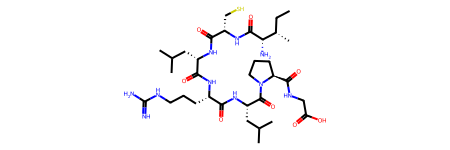

In [ ]:
mol

In [ ]:
from rdkit.Chem import Draw
img = Draw.MolToImage(mol, size=(1800,1800), kekulize=True)
img.save("mol_imagem_3.png")
img.show()

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/var/tmp/tmp_zbd9li7.PNG'


In [ ]:
facp = open("acp.txt",'r')
fnacp = open("nacp.txt", 'r')

acp = facp.readlines()
nacp = fnacp.readlines()

facp.close()
fnacp.close()

tam_acp=len(acp)
tam_nacp=len(nacp)

#Criando a lista para sequências em FASTA
fasta=[]
y=[]

for i in range(tam_acp):
    fasta.append((acp[i][:-1]))
    y.append(1)

for i in range(tam_nacp):
    fasta.append((nacp[i][:-1]))
    y.append(0)

#Convertendo fasta em objeto
fasta=np.array(fasta)

In [ ]:
#-----1D-MACCSKeysFingerprint

featurizer = dc.feat.MACCSKeysFingerprint()
d0 = featurizer.featurize(smiles)
pd.DataFrame(d0).to_csv('maccskeys.csv', index=False, header=False)

In [ ]:
#-----1D-CircularFingerprint

featurizer = dc.feat.CircularFingerprint(size=2048, radius=4)
d1 = featurizer.featurize(smiles)
pd.DataFrame(d1).to_csv('circular.csv', index=False, header=False)

In [ ]:
#-----1D-Mol2VecFingerprint

featurizer = dc.feat.Mol2VecFingerprint()
d2 = featurizer.featurize(smiles)
pd.DataFrame(d2).to_csv('mol2vec.csv', index=False, header=False)

In [ ]:
#-----1D-MordredDescriptors

featurizer = dc.feat.MordredDescriptors(ignore_3D=True)
d3 = featurizer.featurize(mols)

for i in range(len(d3)):
    for j in range(len(d3[0])):
        if np.isnan(d3[i][j]):
            #print(i,j)
            d3[i][j] = 0

pd.DataFrame(d3).to_csv('mordred.csv', index=False, header=False)

In [ ]:
#-----1D-RDKitDescriptors

featurizer = dc.feat.RDKitDescriptors()
d4 = featurizer.featurize(mols)
pd.DataFrame(d4).to_csv('rdkit.csv', index=False, header=False)

In [ ]:
# Remoção de não conformidades
# Necessário para CoulombMatrix e BPSymmetry

for i in range(len(mols)):
    Chem.rdDepictor.Compute2DCoords(mols[i])
    print(i if i%10 != 0 else '\n', end=' ') #para acompanhar execução

In [ ]:
#-----2D-CoulombMatrix Versão DeepChem

featurizer = dc.feat.CoulombMatrix(max_atoms=430)
d5 = featurizer.featurize(mols)

#-----2D-CoulombMatrix Versão RdKit

#from rdkit.Chem.rdMolDescriptors import CalcCoulombMat
#d5 = []
#for i in range(len(mols)):
#  d3.append(Chem.rdMolDescriptors.CalcCoulombMat(mols[i]))
#  print(i if i%10 != 0 else '\n', end=' ') #para acompanhar execução


# armazena em 2D ( 1722 x [430 * 430] )
pd.DataFrame(d5.reshape(d5.shape[0], -1)).to_csv('coulombmatrix.csv', index=False, header=False)

In [ ]:
#-----1D-BPSymmetry

featurizer = dc.feat.BPSymmetryFunctionInput(max_atoms=430)
d6 = featurizer.featurize(mols)

# armazena em 2D ( 1722 x [430 * 4] )
pd.DataFrame(d6.reshape(d6.shape[0], -1)).to_csv('bpsymmetry.csv', index=False, header=False)

In [ ]:
#-----2D-OneHot

featurizer = dc.feat.OneHotFeaturizer(max_length=1011)
d7 = featurizer.featurize(smiles)

# armazena em 2D ( 1722 x [1011 * 35] )
pd.DataFrame(d7.reshape(d7.shape[0], -1)).to_csv('onehot.csv', index=False, header=False)

In [ ]:
#-----2D-SmilesToImage

# Maior sequencia do dataset tem 1011 simbolos
featurizer = dc.feat.SmilesToImage(img_size=150, res=1, img_spec='std', max_len=1011)
d8 = featurizer.featurize(mols)

# armazena em 2D ( 1722 x [150 * 150] )
d8 = d8.reshape(d8.shape[0], 150, 150)
pd.DataFrame(d8.reshape(d8.shape[0], -1)).to_csv('smiles2image.csv', index=False, header=False)

In [ ]:
#-----1D-SmilesToSeq

symbols = ['<unk>','<pad>','#', ')', '(', '+', '-', '/', '1', '3', '2', '5', '4', '7', '6', '8', '=', '@', 'C', 'B', 'F', 'I', 'H', 'O', 'N', 'S', '[', ']', '\\', 'c', 'l', 'o', 'n', 'p', 's', 'r']
numbers = list(range(len(symbols)))
d = zip(symbols,numbers)
dic = dict(d)

featurizer = dc.feat.SmilesToSeq(dic,  max_len = 1011)
d9 = featurizer.featurize(smiles)
pd.DataFrame(d9).to_csv('features/smilestoseq.csv', index=False, header=False)

In [ ]:
numbers

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

In [ ]:
#-----1D-FastaToSeq

symbols = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W','Y']
numbers = list(range(len(symbols)))
d = zip(symbols,numbers)
dic = dict(d)

seqs = []

for s in fasta:

    seq = [-1] * 50
    for i in range(len(s)):
        seq[i] = dic[s[i]]

    seqs.append(seq)

pd.DataFrame(np.array(seqs)).to_csv('features/fastatoseq.csv', index=False, header=False)